In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

new_plants = pd.read_csv("coaldata/New Coal Plants.csv", skiprows=3, index_col="Country", thousands=",")
retired_plants = pd.read_csv("coaldata/Retired Coal Plants.csv", skiprows=3, index_col="Country", thousands=",")

#drop columns we don't want
retired_plants.drop(["Undated", "Dated 2000-2020", "All retired (includes dated and undated)"],axis=1, inplace=True)
new_plants.drop("Total 2000-2020",axis=1, inplace=True)

retired_plants.rename(columns={'July 2020': '2020'}, inplace=True)
new_plants.rename(columns={'July 2020': '2020'}, inplace=True)

#convert MW to GW
retired_plants = retired_plants.div(1000)
new_plants = new_plants.div(1000)


In [2]:
delta = (new_plants.loc["World Total"] - retired_plants.loc["World Total"]).to_frame()

#delete non-country rows
retired_plants.drop(["World Total", "Outside India and China", "India and China"],axis=0, inplace=True)
new_plants.drop(["World Total", "India and China", "Outside India and China", "Outside China" ],axis=0, inplace=True)


# Filters for EU and rest of world
eu_row_names = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom']
non_rest_world_row_names = eu_row_names.copy()
non_rest_world_row_names.append('China')
non_rest_world_row_names.append('India')
non_rest_world_row_names.append('United States')
non_rest_world_row_names.append('EU')

eu_filter = [row in eu_row_names for row in retired_plants.index]
rest_world_filter = [not row in non_rest_world_row_names for row in retired_plants.index]

retired_plants.loc["EU"] = retired_plants.loc[eu_filter].sum() 
retired_plants.loc["Rest of World"] = retired_plants.loc[rest_world_filter].sum() 

eu_filter = [row in eu_row_names for row in new_plants.index]
rest_world_filter = [not row in non_rest_world_row_names for row in new_plants.index]

#calc eu and rest of world totals
new_plants.loc["EU"] = new_plants.loc[eu_filter].sum() 
new_plants.loc["Rest of World"] = new_plants.loc[rest_world_filter].sum() 

new_plants = new_plants.loc[["China", "India", "United States", "EU", "Rest of World"],:]
retired_plants = - retired_plants.loc[["China", "India", "United States", "EU", "Rest of World"],:]


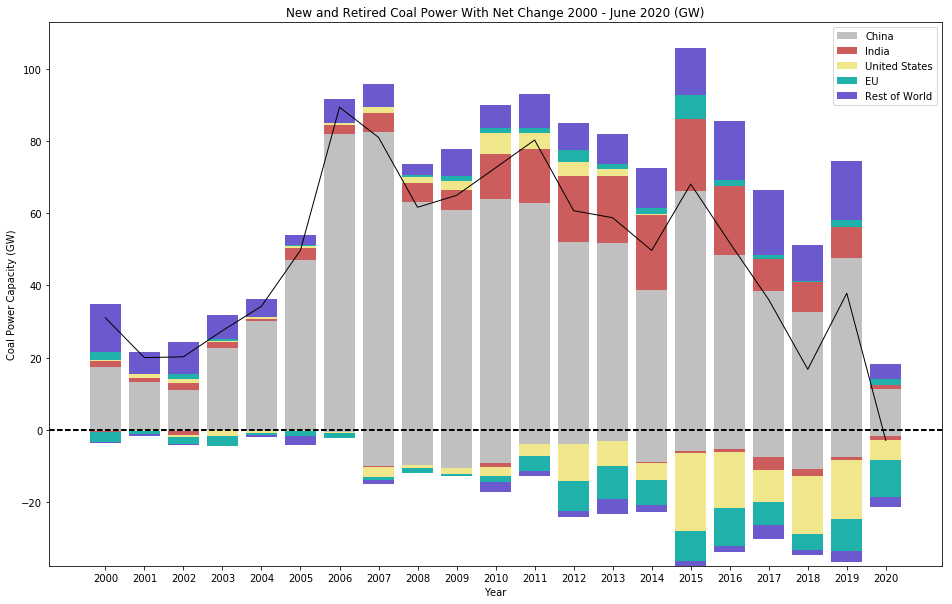

In [3]:
plt.figure(figsize=(16,10))
plt.xlabel('Year')
plt.ylabel('Coal Power Capacity (GW)')

ax = plt.gca()

x_ticks_labels = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']

x= np.arange(len(new_plants.columns))

ax.set_xticks(x )
ax.set_xticklabels(x_ticks_labels)

ax.set_title('New and Retired Coal Power With Net Change 2000 - June 2020 (GW)')



p1 = ax.bar(x, new_plants.loc['China'],  color='silver', label='New Plants')
ax.bar(x, retired_plants.loc['China'], color='silver', label='Retired Plants')

p2 = ax.bar(x, new_plants.loc['India'],  color='indianred',label='New Plants', bottom=new_plants.loc['China'] )
ax.bar(x, retired_plants.loc['India'],  color='indianred',label='Retired Plants', bottom=retired_plants.loc['China'])

p3 = ax.bar(x, new_plants.loc['United States'],  color='khaki',label='New Plants', bottom=new_plants.loc['China'] + new_plants.loc['India'])
ax.bar(x, retired_plants.loc['United States'],color='khaki', label='Retired Plants', bottom=retired_plants.loc['China'] + retired_plants.loc['India'])

p4 = ax.bar(x, new_plants.loc['EU'], color='lightseagreen',label='New Plants', bottom=new_plants.loc['China'] + new_plants.loc['India'] + new_plants.loc['United States'])
ax.bar(x, retired_plants.loc['EU'], color='lightseagreen', label='Retired Plants', bottom=retired_plants.loc['China'] + retired_plants.loc['India'] + retired_plants.loc['United States'])

p5 = ax.bar(x, new_plants.loc['Rest of World'], color='slateblue',label='New Plants', bottom=new_plants.loc['China'] + new_plants.loc['India'] + new_plants.loc['United States'] + new_plants.loc['EU'])
ax.bar(x, retired_plants.loc['Rest of World'],color='slateblue', label='Retired Plants', bottom=retired_plants.loc['China'] + retired_plants.loc['India'] + retired_plants.loc['United States'] + retired_plants.loc['EU'])


ax.plot(x, delta['World Total'], linewidth=1, color='Black', label = 'Change')

plt.axhline(0, color='k', linewidth=2, linestyle='--');

plt.legend((p1, p2, p3, p4, p5), ('China', 'India', 'United States', 'EU', 'Rest of World'))

plt.show()